# Determinando melhores variáveis

Determinar as melhores variáveis de uma amostra utilizando a amostra de doença no coração num intervalo de dez anos

Dataset obtido no Kaggle (https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('../Regressao_Logistica/framingham.csv')

In [3]:
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dados = dados.dropna()

In [5]:
dados = dados.drop('education',axis=1)

Importando bibliotecas que determinarão quais são as variáveis mais importantes

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
X = dados.drop('TenYearCHD',axis=1)

In [8]:
Y = dados['TenYearCHD']

Determinando as melhores características

In [9]:
bestfeatures = SelectKBest(score_func=chi2)

In [10]:
ajuste_melhores = bestfeatures.fit(X,Y)

In [11]:
nota_melhores = pd.DataFrame(ajuste_melhores.scores_)

In [12]:
colunas = pd.DataFrame(X.columns)

In [13]:
notas_caracteristicas = pd.concat([colunas,nota_melhores],axis=1)

In [14]:
notas_caracteristicas.columns = ['Caracteristica','Nota']

In [15]:
notas_caracteristicas = notas_caracteristicas.sort_values(by='Nota', ascending=False)

In [16]:
notas_caracteristicas

,Caracteristica,Nota
9,sysBP,669.136021
13,glucose,379.914235
1,age,296.200344
8,totChol,250.490205
3,cigsPerDay,155.798307
10,diaBP,142.521814
6,prevalentHyp,82.845455
7,diabetes,31.067621
4,BPMeds,28.191569
0,male,17.107751


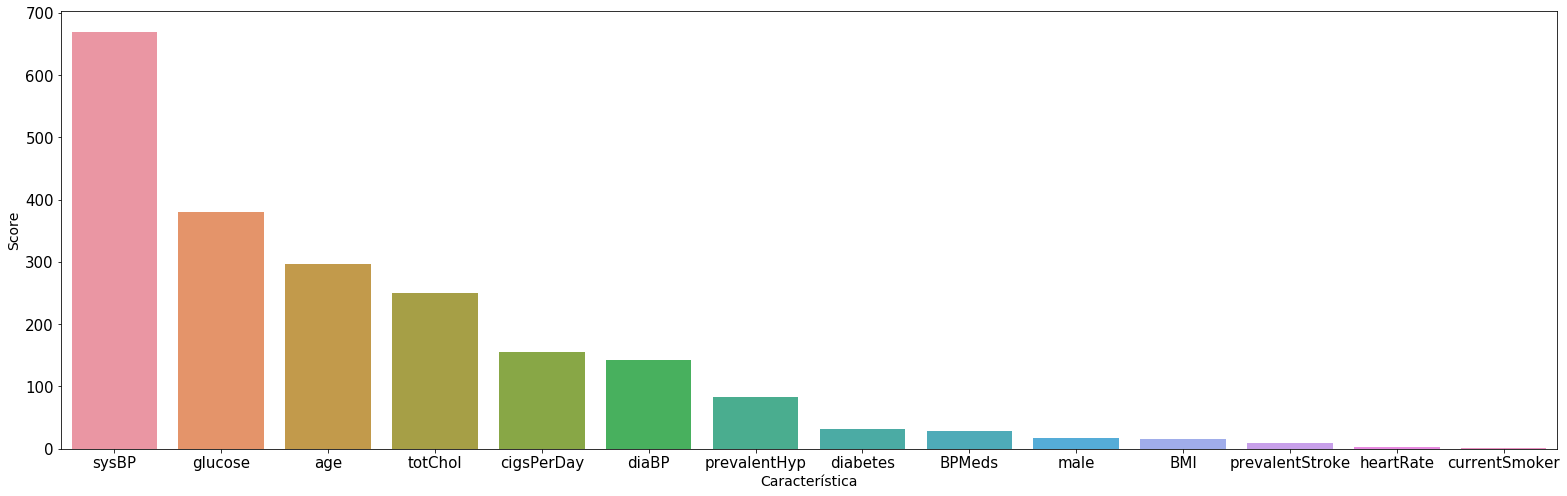

In [17]:
plt.figure(figsize=(22,7))
sns.barplot(x='Caracteristica', y='Nota', data=notas_caracteristicas)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Característica', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.tight_layout()

In [36]:
lista_caracteristica = notas_caracteristicas["Caracteristica"].tolist()[:5]

In [37]:
lista_caracteristica.append('TenYearCHD')

In [38]:
dados = dados[lista_caracteristica]

In [39]:
dados.head()

,sysBP,glucose,age,totChol,cigsPerDay,TenYearCHD
0,106.0,77.0,39,195.0,0.0,0
1,121.0,76.0,46,250.0,0.0,0
2,127.5,70.0,48,245.0,20.0,0
3,150.0,103.0,61,225.0,30.0,1
4,130.0,85.0,46,285.0,23.0,0


Normalizando dados

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
lista_caracteristica.remove('TenYearCHD')

In [42]:
print(lista_caracteristica)

['sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay']


In [43]:
normalizador = MinMaxScaler(feature_range=(0,1)) 

In [45]:
dados[lista_caracteristica] = normalizador.fit_transform(dados[lista_caracteristica])

In [46]:
dados.head()

,sysBP,glucose,age,totChol,cigsPerDay,TenYearCHD
0,0.106383,0.104520,0.184211,0.168378,0.000000,0
1,0.177305,0.101695,0.368421,0.281314,0.000000,0
2,0.208038,0.084746,0.421053,0.271047,0.285714,0
3,0.314421,0.177966,0.763158,0.229979,0.428571,1
4,0.219858,0.127119,0.368421,0.353183,0.328571,0


Balanceando amostra

In [50]:
dados_1 = dados[dados['TenYearCHD']==1]
dados_0 = dados[dados['TenYearCHD']==0]
contagem = dados['TenYearCHD'].value_counts()

In [51]:
dados_0_novo = dados_0.sample(n=contagem[1],random_state=42)

In [52]:
dados = pd.concat([dados_0_novo,dados_1])

Determinando variáveis X e Y

In [53]:
X = dados.drop('TenYearCHD',axis=1).values
Y = dados['TenYearCHD'].values

Separando em amostra de treino e teste

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Modelo de regressão logistica

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
modelo = LogisticRegression()

In [58]:
modelo.fit(X_treino,Y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
Y_previsto = modelo.predict(X_teste)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm=confusion_matrix(Y_teste,Y_previsto)
cm

array([[ 88,  33],
       [ 55, 103]])

Avaliando métricas

In [62]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

In [63]:
f1_score(Y_teste,Y_previsto)

0.7006802721088436

In [64]:
precision_score(Y_teste,Y_previsto)

0.7573529411764706

In [65]:
average_precision_score(Y_teste,Y_previsto)

0.6908500401657873

In [66]:
recall_score(Y_teste,Y_previsto)

0.6518987341772152

In [67]:
accuracy_score(Y_teste,Y_previsto)

0.6845878136200717